In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
from sklearn.metrics import accuracy_score, f1_score
import math
import os
import warnings
warnings.simplefilter("ignore", UserWarning)

In [2]:
# Function to read data from a file and return a list of lines
def read_data(file_name):
    # Open the file with the specified encoding
    with open(file_name, "r", encoding='utf-8') as f:
        content = f.readlines()
    content = [x.strip() for x in content]
    return content

# Read text data from the file and store it
train_text = read_data("train_text.txt")
train_labels = read_data("train_labels.txt")
val_text = read_data("val_text.txt")
val_labels = read_data("val_labels.txt")
test_text = read_data("test_text.txt")
test_labels = read_data("test_labels.txt")

In [3]:
train_labels,train_text

(['2',
  '1',
  '1',
  '1',
  '2',
  '2',
  '2',
  '0',
  '2',
  '1',
  '1',
  '1',
  '2',
  '0',
  '1',
  '1',
  '2',
  '2',
  '0',
  '1',
  '1',
  '2',
  '1',
  '1',
  '1',
  '1',
  '1',
  '2',
  '2',
  '1',
  '1',
  '2',
  '1',
  '2',
  '2',
  '1',
  '1',
  '2',
  '1',
  '1',
  '2',
  '2',
  '0',
  '2',
  '1',
  '1',
  '2',
  '2',
  '1',
  '1',
  '0',
  '2',
  '1',
  '2',
  '1',
  '2',
  '1',
  '1',
  '1',
  '0',
  '0',
  '2',
  '2',
  '2',
  '1',
  '1',
  '0',
  '0',
  '1',
  '1',
  '1',
  '2',
  '1',
  '0',
  '1',
  '1',
  '2',
  '0',
  '2',
  '1',
  '2',
  '0',
  '2',
  '2',
  '2',
  '1',
  '0',
  '1',
  '2',
  '2',
  '2',
  '1',
  '2',
  '1',
  '2',
  '0',
  '2',
  '1',
  '0',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '2',
  '2',
  '2',
  '0',
  '2',
  '0',
  '2',
  '1',
  '2',
  '1',
  '1',
  '1',
  '2',
  '1',
  '2',
  '0',
  '2',
  '2',
  '2',
  '2',
  '1',
  '1',
  '0',
  '2',
  '1',
  '1',
  '0',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '0',
  '1',

In [4]:
val_labels,val_text

(['1',
  '2',
  '0',
  '1',
  '1',
  '1',
  '2',
  '0',
  '2',
  '1',
  '0',
  '2',
  '1',
  '1',
  '0',
  '2',
  '2',
  '1',
  '2',
  '0',
  '2',
  '0',
  '1',
  '1',
  '0',
  '2',
  '2',
  '1',
  '2',
  '2',
  '2',
  '1',
  '2',
  '2',
  '1',
  '1',
  '2',
  '2',
  '1',
  '1',
  '1',
  '1',
  '2',
  '2',
  '2',
  '0',
  '1',
  '1',
  '0',
  '2',
  '2',
  '0',
  '1',
  '2',
  '1',
  '2',
  '2',
  '2',
  '2',
  '2',
  '0',
  '1',
  '1',
  '0',
  '2',
  '2',
  '0',
  '1',
  '2',
  '1',
  '1',
  '1',
  '2',
  '2',
  '2',
  '2',
  '0',
  '1',
  '1',
  '0',
  '2',
  '1',
  '1',
  '1',
  '2',
  '1',
  '1',
  '1',
  '1',
  '1',
  '0',
  '1',
  '0',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '1',
  '1',
  '2',
  '2',
  '0',
  '1',
  '1',
  '1',
  '1',
  '1',
  '2',
  '1',
  '0',
  '0',
  '1',
  '1',
  '0',
  '2',
  '1',
  '2',
  '2',
  '1',
  '2',
  '2',
  '1',
  '1',
  '1',
  '1',
  '2',
  '1',
  '1',
  '2',
  '2',
  '1',
  '0',
  '2',
  '1',
  '2',
  '2',
  '2',
  '2',
  '0',
  '2',

In [5]:
test_labels,test_text

(['1',
  '1',
  '1',
  '2',
  '0',
  '1',
  '1',
  '2',
  '1',
  '0',
  '1',
  '1',
  '2',
  '0',
  '0',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '2',
  '1',
  '1',
  '1',
  '1',
  '0',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '2',
  '1',
  '0',
  '2',
  '1',
  '0',
  '1',
  '0',
  '1',
  '1',
  '2',
  '1',
  '0',
  '1',
  '2',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '1',
  '0',
  '2',
  '1',
  '1',
  '2',
  '1',
  '1',
  '1',
  '2',
  '0',
  '1',
  '1',
  '2',
  '1',
  '1',
  '1',
  '0',
  '1',
  '2',
  '2',
  '0',
  '0',
  '1',
  '1',
  '1',
  '2',
  '0',
  '0',
  '1',
  '1',
  '0',
  '1',
  '1',
  '1',
  '0',
  '1',
  '0',
  '0',
  '2',
  '2',
  '2',
  '0',
  '1',
  '1',
  '1',
  '1',
  '2',
  '0',
  '1',
  '2',
  '1',
  '2',
  '2',
  '0',
  '0',
  '2',
  '1',
  '1',
  '0',
  '2',
  '0',
  '1',
  '0',
  '2',
  '0',
  '2',
  '2',
  '0',
  '0',
  '0',
  '2',
  '0',
  '1',
  '0',
  '0',
  '1',
  '1',
  '1',
  '2',
  '0',
  '1',
  '1',

In [6]:
def read_lexicons(file_name):
    with open(file_name, "r", encoding='utf-8') as f:
        content = f.readlines()
    content = [x.strip().split('\t') for x in content]
    lexicon_dict = {values[0]: {'Negative': float(values[1]), 'Positive': float(values[2])} for values in content if len(values) == 3}

    return lexicon_dict

# Add file names for socialsent_hist_adj and socialsent_hist_freq 2000.tsv
hist_adj_file = "socialsent_hist_adj/2000.tsv"
hist_freq_file = "socialsent_hist_freq/2000.tsv"

# Read the sentiment lexicons from the 2000.tsv files
hist_adj_lexicon = read_lexicons(hist_adj_file)
hist_freq_lexicon = read_lexicons(hist_freq_file)

# Read subreddit lexicons
lexicon_files = [
   "3DS.tsv", "4chan.tsv", "2007scape.tsv", "ACTrade.tsv", "amiugly.tsv", "BabyBumps.tsv", "baseball.tsv", "canada.tsv",
    "CasualConversation.tsv", "DarknetMarkets.tsv", "darksouls.tsv", "elderscrollsonline.tsv", "Eve.tsv", "Fallout.tsv",
    "fantasyfootball.tsv", "GameDeals.tsv", "gamegrumps.tsv", "halo.tsv", "Homebrewing.tsv", "IAmA.tsv", "india.tsv",
    "jailbreak.tsv", "Jokes.tsv", "KerbalSpaceProgram.tsv", "Keto.tsv", "leagueoflegends.tsv", "Libertarian.tsv",
    "magicTCG.tsv", "MakeupAddiction.tsv", "Naruto.tsv", "nba.tsv", "oculus.tsv", "OkCupid.tsv", "Parenting.tsv",
    "pathofexile.tsv", "raisedbynarcissists.tsv", "Random_Acts_Of_Amazon.tsv", "science.tsv", "Seattle.tsv",
    "TalesFromRetail.tsv", "talesfromtechsupport.tsv", "ultrahardcore.tsv", "videos.tsv", "Warthunder.tsv",
    "whowouldwin.tsv", "xboxone.tsv", "yugioh.tsv"
]

lexicon_dicts = []
for file in lexicon_files:
    lexicon_dicts.append(read_lexicons(os.path.join("socialsent_subreddits", file)))

# Combine all lexicons into a single list
all_lexicons = [hist_adj_lexicon, hist_freq_lexicon] + lexicon_dicts


In [7]:
for index, lexicon in enumerate(all_lexicons):
    print(f"Lexicon {index + 1}:\n")
    for i, (word, scores) in enumerate(lexicon.items()):
        if i >= 100:
            break
        print(f"{word}: Negative {scores['Negative']}, Positive {scores['Positive']}")
    
    print()


Lexicon 1:

vile: Negative -3.18, Positive 0.61
tragic: Negative -3.15, Positive 0.66
ugly: Negative -3.1, Positive 0.49
traumatic: Negative -3.08, Positive 0.68
stinging: Negative -3.05, Positive 0.56
awful: Negative -2.89, Positive 0.49
foul: Negative -2.84, Positive 0.5
horrific: Negative -2.83, Positive 0.69
fatal: Negative -2.82, Positive 0.77
sick: Negative -2.81, Positive 0.46
painful: Negative -2.67, Positive 0.61
unnatural: Negative -2.64, Positive 0.6
dire: Negative -2.62, Positive 0.64
terrible: Negative -2.61, Positive 0.69
minor: Negative -2.59, Positive 0.79
cruel: Negative -2.59, Positive 0.63
frightening: Negative -2.59, Positive 0.52
unlucky: Negative -2.58, Positive 0.54
hideous: Negative -2.58, Positive 0.64
miserable: Negative -2.57, Positive 0.47
mindless: Negative -2.56, Positive 0.79
hungry: Negative -2.55, Positive 0.7
insecure: Negative -2.55, Positive 0.72
ominous: Negative -2.53, Positive 0.62
terrifying: Negative -2.47, Positive 0.7
unbearable: Negative -2.4

In [8]:
def extract_features(tweet, all_lexicons):
    words = tweet.split()
    word_count = len(words)
    longest_word = max(words, key=len)

    features = [0] * 12
    for i, lexicon_dict in enumerate(all_lexicons[:9]):
        score = sum([lexicon_dict.get(word, {'Negative': 0, 'Positive': 0})['Negative'] + 
                     lexicon_dict.get(word, {'Negative': 0, 'Positive': 0})['Positive']
                     for word in words])
        features[i] = score

    features[9] = math.log(word_count) if word_count > 0 else 0
    features[10] = math.log(len(longest_word)) if longest_word else 0
    long_word_count = len([word for word in words if len(word) >= 5])
    features[11] = math.log(long_word_count) if long_word_count > 0 else 0

    return features

train_features = [extract_features(tweet, all_lexicons) for tweet in train_text]
val_features = [extract_features(tweet, all_lexicons) for tweet in val_text]
test_features = [extract_features(tweet, all_lexicons) for tweet in test_text]


In [9]:
train_features

[[0.51,
  0.9700000000000001,
  2.75,
  5.92,
  1.3,
  4.82,
  1.6500000000000001,
  4.11,
  8.44,
  2.8903717578961645,
  3.2188758248682006,
  2.302585092994046],
 [0,
  0.12999999999999998,
  4.2,
  2.61,
  2.76,
  3.26,
  1.03,
  0,
  5.53,
  2.6390573296152584,
  2.4849066497880004,
  1.9459101490553132],
 [0,
  4.86,
  16.209999999999997,
  29.620000000000005,
  20.13,
  23.520000000000003,
  7.050000000000001,
  3.5199999999999996,
  16.619999999999997,
  3.1780538303479458,
  2.1972245773362196,
  2.1972245773362196],
 [0.71,
  1.42,
  4.17,
  8.370000000000001,
  6.700000000000001,
  10.66,
  1.54,
  5.72,
  14.969999999999999,
  3.1354942159291497,
  2.3978952727983707,
  2.5649493574615367],
 [0,
  1.5,
  13.51,
  9.97,
  13.699999999999998,
  16.89,
  4.8500000000000005,
  7.38,
  14.35,
  3.044522437723423,
  2.0794415416798357,
  2.3978952727983707],
 [0,
  1.0699999999999998,
  5.69,
  5.4399999999999995,
  2.93,
  4.17,
  1.68,
  3.5500000000000003,
  7.24,
  2.83321334

In [10]:
val_features

[[0,
  0,
  1.9100000000000001,
  1.81,
  1.17,
  2.08,
  2.1,
  0.45,
  0.97,
  2.5649493574615367,
  2.1972245773362196,
  1.9459101490553132],
 [1.23,
  2.4099999999999997,
  4.97,
  12.97,
  9.799999999999999,
  6.4799999999999995,
  6.050000000000001,
  5.77,
  10.600000000000001,
  2.772588722239781,
  2.1972245773362196,
  2.1972245773362196],
 [0,
  2.8100000000000005,
  16.86,
  15.64,
  15.34,
  12.12,
  12.28,
  9.07,
  24.070000000000004,
  3.2188758248682006,
  2.1972245773362196,
  2.1972245773362196],
 [0,
  1.15,
  10.76,
  24.560000000000002,
  9.82,
  12.66,
  4.870000000000001,
  5.43,
  11.11,
  2.4849066497880004,
  2.0794415416798357,
  1.0986122886681098],
 [0,
  1.37,
  8.28,
  9.76,
  9.98,
  10.54,
  4.49,
  1.12,
  17.2,
  2.833213344056216,
  2.0794415416798357,
  2.0794415416798357],
 [0,
  1.9499999999999997,
  11.46,
  16.29,
  10.44,
  15.68,
  5.220000000000001,
  6.3500000000000005,
  10.950000000000001,
  3.1354942159291497,
  2.4849066497880004,
  1.

In [11]:
test_features

[[-0.44,
  0.3400000000000001,
  6.83,
  21.67,
  7.699999999999999,
  14.399999999999999,
  4.27,
  2.88,
  9.6,
  2.8903717578961645,
  2.1972245773362196,
  2.0794415416798357],
 [0.98,
  1.71,
  3.7,
  10.25,
  7.210000000000001,
  8.06,
  3.9,
  4.28,
  5.8,
  2.70805020110221,
  2.0794415416798357,
  1.791759469228055],
 [0,
  1.1500000000000004,
  4.970000000000001,
  8.760000000000002,
  4.559999999999999,
  9.95,
  1.7600000000000002,
  2.9799999999999995,
  7.09,
  2.70805020110221,
  2.3978952727983707,
  2.1972245773362196],
 [0,
  2.7199999999999998,
  7.92,
  15.620000000000001,
  8.68,
  14.02,
  2.5500000000000003,
  4.54,
  8.780000000000001,
  2.6390573296152584,
  2.9444389791664403,
  1.791759469228055],
 [0,
  0.76,
  5.76,
  3.51,
  5.81,
  9.110000000000001,
  3.6399999999999997,
  1.75,
  8.22,
  3.091042453358316,
  2.1972245773362196,
  2.5649493574615367],
 [0,
  1.54,
  7.83,
  12.919999999999998,
  9.92,
  9.21,
  5.119999999999999,
  5.129999999999999,
  1

In [12]:
# Convert the list of training features and labels to PyTorch tensors
X_train = torch.tensor(train_features, dtype=torch.float32)
y_train = torch.tensor(list(map(int, train_labels)), dtype=torch.float32).view(-1, 1)

# Convert the list of validation features and labels to PyTorch tensors
X_val = torch.tensor(val_features, dtype=torch.float32)
y_val = torch.tensor(list(map(int, val_labels)), dtype=torch.float32).view(-1, 1)

# Convert the list of test features and labels to PyTorch tensors
X_test = torch.tensor(test_features, dtype=torch.float32)
y_test = torch.tensor(list(map(int, test_labels)), dtype=torch.float32).view(-1, 1)



In [13]:
class LogisticRegression:
    def __init__(self, num_features):
        self.weights = Variable(torch.randn(num_features, 1), requires_grad=True)
        self.bias = Variable(torch.randn(1), requires_grad=True)

    def forward(self, X):
        return torch.sigmoid(torch.mm(X, self.weights) + self.bias)

    def train(self, X_train, y_train, X_val, y_val, lr=0.01, epochs=100):
        train_losses = []
        val_accuracies = []
        val_f1_scores = []

        for epoch in range(epochs):
            y_pred = self.forward(X_train)
            loss = torch.mean(-y_train * torch.log(y_pred) - (1 - y_train) * torch.log(1 - y_pred))
            train_losses.append(loss.item())
            loss.backward()

            with torch.no_grad():
                self.weights -= lr * self.weights.grad
                self.bias -= lr * self.bias.grad
                self.weights.grad.zero_()
                self.bias.grad.zero_()

            val_accuracy, val_f1 = self.evaluate(X_val, y_val)
            val_accuracies.append(val_accuracy)
            val_f1_scores.append(val_f1)

        return train_losses, val_accuracies, val_f1_scores

    def predict(self, X):
        return (self.forward(X) >= 0.5).float()

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        accuracy = accuracy_score(y, y_pred)
        f1 = f1_score(y, y_pred, average='weighted')
        return accuracy, f1


In [20]:
Model = LogisticRegression(num_features=12)
train_losses, val_accuracies, val_f1_scores = Model.train(X_train, y_train, X_val, y_val, lr=0.001, epochs=100)
accuracy, f1 = Model.evaluate(X_test, y_test)
print(f"Accuracy using Logistic Regression: {accuracy:.4f}")
print(f"F1 Score of the logistic regression Model: {f1:.4f}")


Accuracy using Logistic Regression: 0.3233
F1 Score of the logistic regression Model: 0.1580


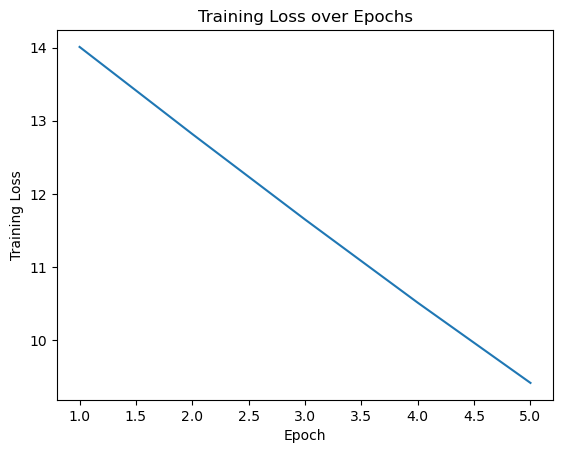

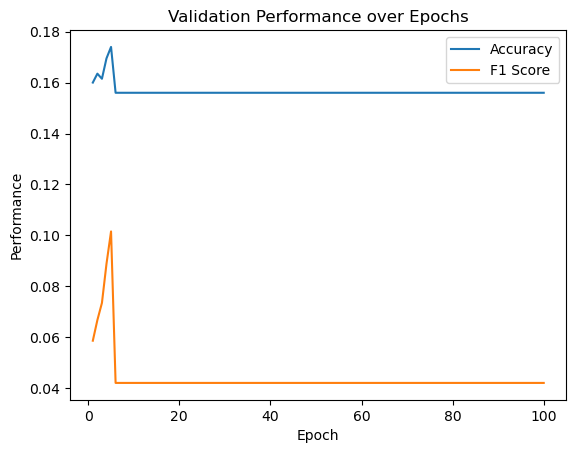

In [21]:
# Plot training loss over epochs
plt.figure()
plt.plot(range(1, 101), train_losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss over Epochs')
plt.show()

# Plot validation accuracy and F1 score over epochs
plt.figure()
plt.plot(range(1, 101), val_accuracies, label='Accuracy')
plt.plot(range(1, 101), val_f1_scores, label='F1 Score')
plt.xlabel('Epoch')
plt.ylabel('Performance')
plt.title('Validation Performance over Epochs')
plt.legend()
plt.show()